# Постановка задачи

Задача: численно решить двумерную систему уравнений мелкой воды, следующего вида:

\begin{equation*}
 \begin{cases}
   \frac{\partial u}{\partial t} = -u \frac{\partial u}{\partial x} - v \frac{\partial u}{\partial y} - g \frac{\partial h}{\partial x} + fv\\
   \\
   \frac{\partial v}{\partial t} = -u \frac{\partial v}{\partial x} - v \frac{\partial v}{\partial y} - g \frac{\partial h}{\partial y} - fu\\
   \\
   \frac{\partial h}{\partial t} = - \frac{\partial (hu)}{\partial x} -  \frac{\partial (hv)}{\partial y}
 \end{cases}
\end{equation*}

Где $u, v$ - компоненты вектора скорости, $h$ - высота уровня жидкости, $g = 9.8$ - ускорение свободного падения, $f = 2 \cdot 7.292 \cdot 10^{-5}$ - параметр Кориолиса.

Расчетная область - бипериодический квадрат (тор) размера $[0, 2 \pi a] \times [0, 2 \pi a]$, где $a = 6371.22 \cdot 10^3$ - радиус Земли.

Для тестов, возьмем для начала стационарное решение (геострофическое равновесие), поле скорости следующего вида

$$u(x, y) = A_x (cos(x)cos(y) - sin(x)sin(y))$$
$$v(x, y) = A_y (-cos(x)cos(y) + sin(x)sin(y))$$

Затем проверим что такие поля дают стационарное решение:

$$u(x, y) = \frac{\sqrt{2}}{2} u0 \left(cos\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) - sin\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right)$$

$$v(x, y) = \frac{\sqrt{2}}{2} u0 \left( -cos\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) + sin\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right)$$

$$h = h_{mean} - \frac{u0 \cdot f \cdot a}{g} \frac{\sqrt{2}}{2} \left(sin\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) + cos\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right)$$
Где $u0 = 50$, $h_{mean} = 10000$

# Стационарное решение

Для того, чтобы проверить, что поля скорости заданные в условии дают стационарное решение, нужно подставить их в уравнения двумерной системы мелкой воды и убедиться, что частные производные по времени равны нулю:

$$\frac{\partial u}{\partial t} = 0, \frac{\partial v}{\partial t} = 0, \frac{\partial h}{\partial t} = 0$$

Распишем первое уравнение:

$$- \frac{\sqrt{2}}{2} u0 \left(cos\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) - sin\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right) \cdot \frac{\sqrt{2}}{2a} u0 \left(-sin\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) - cos\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right) - \frac{\sqrt{2}}{2} u0 \left( -cos\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) + sin\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right) \cdot \frac{\sqrt{2}}{2a} u0 \left(-cos\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right) - sin\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right)\right) + u0 \cdot f \cdot \frac{\sqrt{2}}{2} \left(cos\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) - sin\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right) + f \cdot \frac{\sqrt{2}}{2} u0 \left( -cos\left(\frac{x}{a}\right)cos\left(\frac{y}{a}\right) + sin\left(\frac{x}{a}\right)sin\left(\frac{y}{a}\right)\right)$$

Сократим и упростим:

$$\frac{u0^2}{2a} \cdot cos\left(\frac{x+y}{a}\right) \cdot sin\left(\frac{x+y}{a}\right) - \frac{u0^2}{2a} \cdot cos\left(\frac{x+y}{a}\right) \cdot sin\left(\frac{x+y}{a}\right) + u0 \cdot f \cdot \frac{\sqrt{2}}{2} cos\left(\frac{x+y}{a}\right) - f \cdot \frac{\sqrt{2}}{2} u0 \cdot cos\left(\frac{x+y}{a}\right) = 0$$

Аналогично получается и для остальных уравнений

Итого, если мы подставим выражения для $u(x,y)$, $v(x,y)$ и $h(x,y)$ в уравнения системы мелкой воды, то получим:

$$0 = -u \frac{\partial u}{\partial x} - v \frac{\partial u}{\partial y} - g \frac{\partial h}{\partial x} + fv$$

$$0 = -u \frac{\partial v}{\partial x} - v \frac{\partial v}{\partial y} - g \frac{\partial h}{\partial y} - fu$$

$$0 = - \frac{\partial (hu)}{\partial x} -  \frac{\partial (hv)}{\partial y}$$

что доказывает, что скорости $u(x,y)$ и $v(x,y)$ вместе с высотой $h(x,y)$ являются стационарным решением двумерной системы мелкой воды.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
a = 6371.22e3  # Радиус Земли
g = 9.8  # Ускорение свободного падения
f = 2 * 7.292 * 10**(-5)  # Параметр Кориолиса
h_mean = 10000
u_0 = 50
# Расчетные параметры
L = 2 * np.pi * a # Размер расчетной области
Nx = 100
Ny = 100
dx = L / (Nx - 1)
dy = L / (Ny - 1)
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
X, Y = np.meshgrid(x, y)

# Параметры времени
T = 24*3600
dt = T / (Nx -1)

In [3]:
# Начальные условия
u0 = np.sqrt(2)/2 * u_0 * (np.outer(np.cos(x/a),np.cos(y/a)) - np.outer(np.sin(x/a),np.sin(y/a)))
v0 = np.sqrt(2)/2 * u_0 * (-np.outer(np.cos(x/a),np.cos(y/a)) + np.outer(np.sin(x/a),np.sin(y/a)))
h0 = h_mean - (u_0*f*a/g)*np.sqrt(2)/2 * (np.outer(np.sin(x/a),np.cos(y/a)) + np.outer(np.cos(x/a),np.sin(y/a)))

In [4]:
#u0 = np.zeros((Nx, Ny))
#v0 = np.zeros((Nx, Ny))
#h0 = np.zeros((Nx, Ny))

In [5]:
u0

array([[35.35533906, 35.28415732, 35.07089874, ..., 35.07089874,
        35.28415732, 35.35533906],
       [35.28415732, 35.07089874, 34.71642202, ..., 35.28415732,
        35.35533906, 35.28415732],
       [35.07089874, 34.71642202, 34.22215453, ..., 35.35533906,
        35.28415732, 35.07089874],
       ...,
       [35.07089874, 35.28415732, 35.35533906, ..., 34.22215453,
        34.71642202, 35.07089874],
       [35.28415732, 35.35533906, 35.28415732, ..., 34.71642202,
        35.07089874, 35.28415732],
       [35.35533906, 35.28415732, 35.07089874, ..., 35.07089874,
        35.28415732, 35.35533906]])

Распишем функции для подсчета градиента, с учетом периодических условий на границе

In [6]:
def gradient_dy(u,dy):
    n=len(u)
    answer=np.zeros((n,n))
    answer[0,:]=u[1,:]-u[-2,:]
    answer[1:-1,:]=u[2:,:]-u[0:-2,:]
    answer[-1,:]=answer[0,:]    
    answer=answer/dy/2
    return answer

In [7]:
def gradient_dx(u,dx):
    n=len(u)
    answer=np.zeros((n,n))
    answer[:,0]=u[:,1]-u[:,-2]
    answer[:,1:-1]=u[:,2:]-u[:,0:-2]
    answer[:,-1]=answer[:,0]
    answer=answer/dx/2
    return answer

In [8]:
# Интегрирование во времени
def rhs_u(u, v, h):
    du_dt = -u * gradient_dx(u, dx) - v * gradient_dy(u, dy) - g * gradient_dx(h, dx) + f * v
    return du_dt

def rhs_v(u, v, h):
    dv_dt = -u * gradient_dx(v, dx) - v * gradient_dy(v, dy) - g * gradient_dy(h, dy) - f * u
    return dv_dt

def rhs_h(u, v, h):
    dh_dt = -gradient_dx(h*u, dx) - gradient_dy(h*v, dy)
    return dh_dt

def runge_kutta4_step(u, v, h, dt):
    k1u = rhs_u(u, v, h)
    k1v = rhs_v(u, v, h)
    k1h = rhs_h(u, v, h)
    #print("first")
    k2u = rhs_u(u + 0.5 * dt * k1u, v + 0.5 * dt * k1v, h + 0.5 * dt * k1h)
    k2v = rhs_v(u + 0.5 * dt * k1u, v + 0.5 * dt * k1v, h + 0.5 * dt * k1h)
    k2h = rhs_h(u + 0.5 * dt * k1u, v + 0.5 * dt * k1v, h + 0.5 * dt * k1h)
    #print("second")
    k3u = rhs_u(u + 0.5 * dt * k2u, v + 0.5 * dt * k2v, h + 0.5 * dt * k2h)
    k3v = rhs_v(u + 0.5 * dt * k2u, v + 0.5 * dt * k2v, h + 0.5 * dt * k2h)
    k3h = rhs_h(u + 0.5 * dt * k2u, v + 0.5 * dt * k2v, h + 0.5 * dt * k2h)
    #print("third")
    k4u = rhs_u(u + dt * k3u, v + dt * k3v, h + dt * k3h)
    k4v = rhs_v(u + dt * k3u, v + dt * k3v, h + dt * k3h)
    k4h = rhs_h(u + dt * k3u, v + dt * k3v, h + dt * k3h)

    u_new = u + (dt / 6) * (k1u + 2 * k2u + 2 * k3u + k4u)
    v_new = v + (dt / 6) * (k1v + 2 * k2v + 2 * k3v + k4v)
    h_new = h + (dt / 6) * (k1h + 2 * k2h + 2 * k3h + k4h)

    return u_new, v_new, h_new

In [9]:
# Интегрирование во времени
def solve_system(u0, v0, h0, dt, T):
    Nt = int(T / dt)
    u = u0.copy()
    v = v0.copy()
    h = h0.copy()

    for n in range(Nt):
        u, v, h = runge_kutta4_step(u, v, h, dt)

    return u, v, h

# Решение системы
u, v, h = solve_system(u0, v0, h0, dt, T)

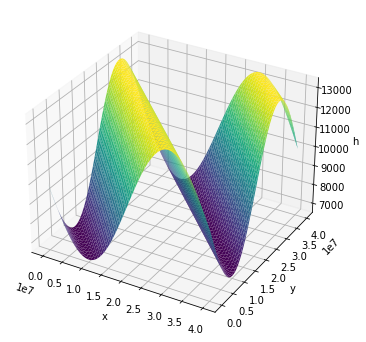

In [10]:
# Визуализация результата
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, h, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('h')
plt.show()

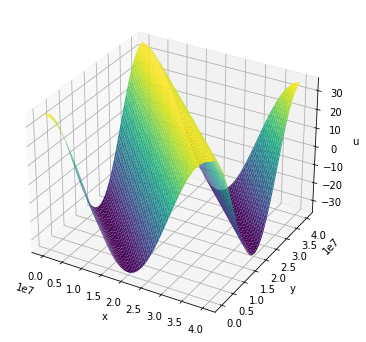

In [11]:
# Построение графика для переменной u
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
plt.show()

Посмотрим как ведет себя ошибка

In [38]:
def get_norm(u_calc, u_anal):
    dM = u_calc - u_anal
    return np.max(np.abs(dM))

In [56]:
Nx1 = 200
Ny1 = 200
dx1 = L / (Nx1 - 1)
dy1 = L / (Ny1 - 1)
x1 = np.linspace(0, L, Nx1)
y1 = np.linspace(0, L, Ny1)
X1, Y1 = np.meshgrid(x1, y1)

# Параметры времени
Nt = 400
T = 24*3600
dt1 = T / (Nt -1)

In [57]:
u01 = np.sqrt(2)/2 * u_0 * (np.outer(np.cos(x1/a),np.cos(y1/a)) - np.outer(np.sin(x1/a),np.sin(y1/a)))
v01 = np.sqrt(2)/2 * u_0 * (-np.outer(np.cos(x1/a),np.cos(y1/a)) + np.outer(np.sin(x1/a),np.sin(y1/a)))
h01 = h_mean - (u_0*f*a/g)*np.sqrt(2)/2 * (np.outer(np.sin(x1/a),np.cos(y1/a)) + np.outer(np.cos(x1/a),np.sin(y1/a)))

In [58]:
u2, v2, h2 = solve_system(u01, v01, h01, dt1, T)

In [59]:
get_norm(u01, u2)

9.963924321526523

In [52]:
Nx2 = 400
Ny2 = 400
dx2 = L / (Nx2 - 1)
dy2 = L / (Ny2 - 1)
x2 = np.linspace(0, L, Nx2)
y2 = np.linspace(0, L, Ny2)
X2, Y2 = np.meshgrid(x2, y2)

# Параметры времени
Nt2 = 800
T = 24*3600
dt2 = T / (Nt2 -1)

In [53]:
u02 = np.sqrt(2)/2 * u_0 * (np.outer(np.cos(x2/a),np.cos(y2/a)) - np.outer(np.sin(x2/a),np.sin(y2/a)))
v02 = np.sqrt(2)/2 * u_0 * (-np.outer(np.cos(x2/a),np.cos(y2/a)) + np.outer(np.sin(x2/a),np.sin(y2/a)))
h02 = h_mean - (u_0*f*a/g)*np.sqrt(2)/2 * (np.outer(np.sin(x2/a),np.cos(y2/a)) + np.outer(np.cos(x2/a),np.sin(y2/a)))

In [54]:
u3, v3, h3 = solve_system(u02, v02, h02, dt2, T)

In [55]:
get_norm(u02, u3)

4.2536491409680615

Видим то при увеличении точности ошибка уменьшается

In [16]:
#Стационарное решение
def u_real(x, y):
    return np.sqrt(2)/2 * u_0 * (np.cos(x/a)*np.cos(y/a) - np.sin(x/a)*np.sin(y/a))

def v_real(x, y):
    return np.sqrt(2)/2 * u_0 * (-np.cos(x/a)*np.cos(y/a) + np.sin(x/a)*np.sin(y/a))

def h_real(x, y):
    return h_mean - (u_0*f*a/g)*np.sqrt(2)/2 * (np.sin(x/a)*np.cos(y/a) + np.cos(x/a)*np.sin(y/a))

In [17]:
u_values = u_real(X, Y)
v_values = v_real(X, Y)
h_values = h_real(X, Y)

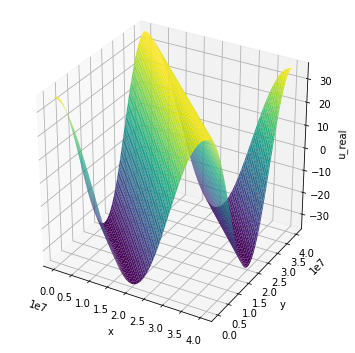

In [18]:
# Построение графика для переменной u
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u_values, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u_real')
ax.set_box_aspect([1,1,1])
plt.show()

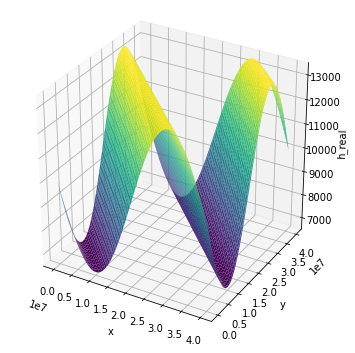

In [19]:
# Построение графика для переменной h
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, h_values, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('h_real')
ax.set_box_aspect([1,1,1])
plt.show()